# Let's analyze the columns elements in the datasets

In [117]:
import pandas as pd
import numpy as np
df = pd.read_csv("PM_train.txt",sep=" ", header=None) #train
df2 = pd.read_csv("PM_test.txt",sep=" ", header=None) #test


In [126]:
# Let's check the samples dimensions
print(df.shape,df2.shape)

(20631, 26) (13096, 26)


In [41]:
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN


In [42]:
df2.head(4)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN


### Let's drop the last two columns with NA's values in both samples and transform the target variable to dummy

In [118]:
#creating a function to drop and transform the variables

def features_eng(data):
    data.drop(data.columns[[26,27]], axis = 1, inplace = True) #drop
    data.iloc[:,0] = data.iloc[:,0].apply(lambda x: 0 if x < 20 else 1) #Dummy target variable
    return data

df = features_eng(df)
df2 = features_eng(df2)


In [46]:
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,0,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739


In [47]:
df2.head(4)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,0,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,0,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,0,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737


# Analyzing the ratio of the target variable

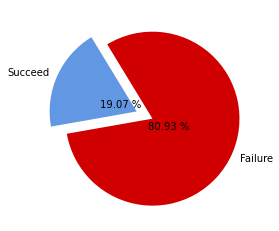

In [125]:
import matplotlib.pyplot as plt

failure = df.loc[df.iloc[:,0] == 1].count()[0]
Not_broke = df.loc[df.iloc[:,0] == 0].count()[0]

labels = ['Failure', 'Succeed']
colors = ['#d10000', '#6297e3']
explode = (.1,.1)


plt.pie([Broke,Not_broke], labels = labels, colors = colors, 
        autopct = '%.2f %%', pctdistance= 0.2, startangle=190, explode = explode)
plt.show()

In [50]:
print(df.iloc[:,0].value_counts())

1    16697
0     3934
Name: 0, dtype: int64


# Predictions

In [62]:
#libraries

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Splitting data set

In [119]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df2 = df2.sample(frac = 1)

In [120]:


# splitting the data
x_train = df.iloc[:,1:25]
y_train= df.iloc[:,0]

x_test = df2.iloc[:,1:25]
y_test = df2.iloc[:,0]



# Choosing the best model

In [115]:
# Applying a voting method to choose models by its evaluating metrics

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


models = {}


models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
models['svm'] = SVC()
models['bayes'] = GaussianNB()
models['rdm'] = RandomForestClassifier()
models['lgc'] = LogisticRegression(max_iter=1000)
models['ada'] = AdaBoostClassifier()
models['gda'] = GradientBoostingClassifier()
models['bca'] = BaggingClassifier()


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    classification = classification_report(y_test,y_pred)
    print(name, classification)

knn               precision    recall  f1-score   support

           0       0.20      0.08      0.12      2251
           1       0.83      0.93      0.88     10845

    accuracy                           0.79     13096
   macro avg       0.52      0.51      0.50     13096
weighted avg       0.72      0.79      0.75     13096

cart               precision    recall  f1-score   support

           0       0.19      0.24      0.21      2251
           1       0.83      0.79      0.81     10845

    accuracy                           0.69     13096
   macro avg       0.51      0.51      0.51     13096
weighted avg       0.72      0.69      0.71     13096

svm               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2251
           1       0.83      1.00      0.91     10845

    accuracy                           0.83     13096
   macro avg       0.41      0.50      0.45     13096
weighted avg       0.69      0.83      0.75     13096

bayes 

## KNN had the best F1-SCORE without overfitting

#### It's possible to notice that some models had overfitting since the F1-SCORE for "0" classifications is almost zero. So the model is generelizing predictions to "1"